In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [5]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [9]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [13]:
### what is the average Rating for products in the "Home and lifestyle" Product line?

In [15]:
avg_home_lifestyle_rating = df[df['Product line'] == 'Home and lifestyle']['Rating'].mean()
result = [ ('Home and lifestyle average rating', avg_home_lifestyle_rating)]
pd.DataFrame(result)

,0,1
0,Home and lifestyle average rating,6.8375


#### Question 3

In [18]:
### how many products in each Product line were sold during the first week (days 1-7 including) of February 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y", errors='coerce')

In [36]:
cond_1st_week = (df['Date'].dt.day >= 1) & (df['Date'].dt.day <= 7) 
cond_feb = df['Date'].dt.month == 2
cond_2019 = df['Date'].dt.year == 2019
product_and_quantity = pd.DataFrame(df[cond_1st_week & cond_feb & cond_2019].groupby('Product line')['Quantity'].sum().reset_index())
product_and_quantity


,Product line,Quantity
0,Electronic accessories,38
1,Fashion accessories,42
2,Food and beverages,38
3,Health and beauty,21
4,Home and lifestyle,38
5,Sports and travel,49


#### Question 4

In [39]:
### plot a bar chart showing the number of products per category computed in the previous question

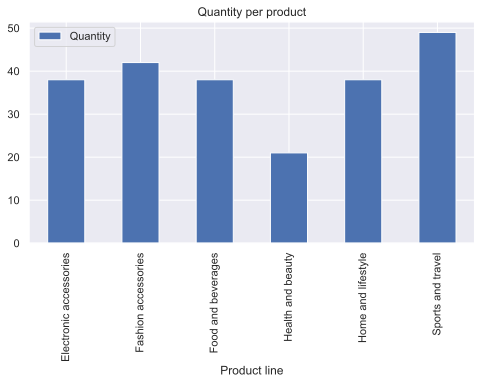

In [41]:
product_and_quantity.plot(kind='bar', x='Product line', y='Quantity', title  = 'Quantity per product')
plt.show()

#### Question 5

In [44]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

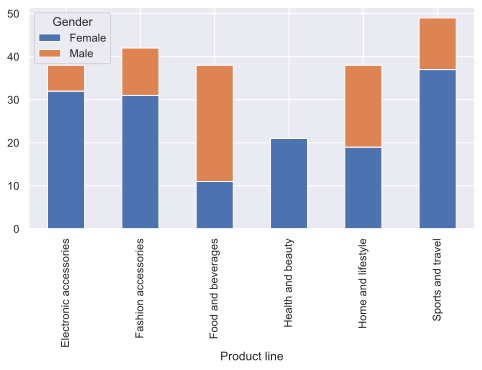

In [46]:
feb_1st_week_quanity_by_gender = df[cond_1st_week & cond_feb & cond_2019].groupby(['Product line', 'Gender'])['Quantity'].sum().unstack()
feb_1st_week_quanity_by_gender.reset_index()
feb_1st_week_quanity_by_gender.plot(kind='bar', stacked=True)
plt.show()

#### Question 6

In [49]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

In [51]:
df.groupby('Payment')['Total'].sum().reset_index()

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


#### Question 7

In [54]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

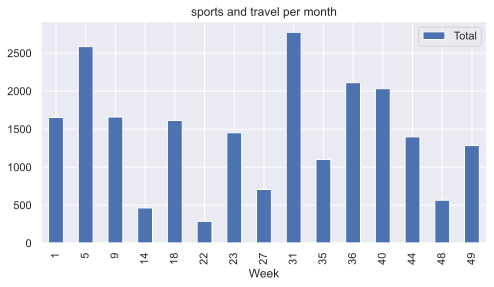

In [67]:
df['Week'] = df['Date'].dt.isocalendar().week
df_sports = df[df['Product line'] == 'Sports and travel']
df_sports
sports_by_week = df_sports.groupby('Week')['Total'].sum().reset_index()
sports_by_week.plot(kind='bar', x='Week', y='Total', title  = 'sports and travel per month')
plt.show()

#### Question 8

In [ ]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 9

In [ ]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 10

In [ ]:
### what is the total income of strategic products by City?

### for each non-strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales (the "Total" column) for that line in the city